In [109]:
# Importing libraries & setting filepath
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
file_path='C:\\Users\Raviraj Kuber\\Documents\\IIITB\\ML1\\Lead Case Study\\Lead+Scoring+Case+Study\\Lead Scoring Assignment\\Leads.csv'

In [110]:
#Loading Data 
base_data_df=pd.read_csv(file_path)

**Initial Data Analysis**

In [111]:
#View Loaded Data
base_data_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [112]:
# View Records & Feature Counts
base_data_df.shape

(9240, 37)

In [113]:
base_data_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [114]:
#View Data Types and Record Counts
base_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

**Inference from Above Analysis- Columns have Null Values. Analyzing Ratio of Nulls**

In [115]:
round(((base_data_df.isnull().sum()/len(base_data_df))*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

**Data Cleansing & Massaging Activity**

In [116]:
# Country Field
base_data_df['Country'].isnull().describe()

count      9240
unique        2
top       False
freq       6779
Name: Country, dtype: object

In [117]:
# Country Field
base_data_df['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

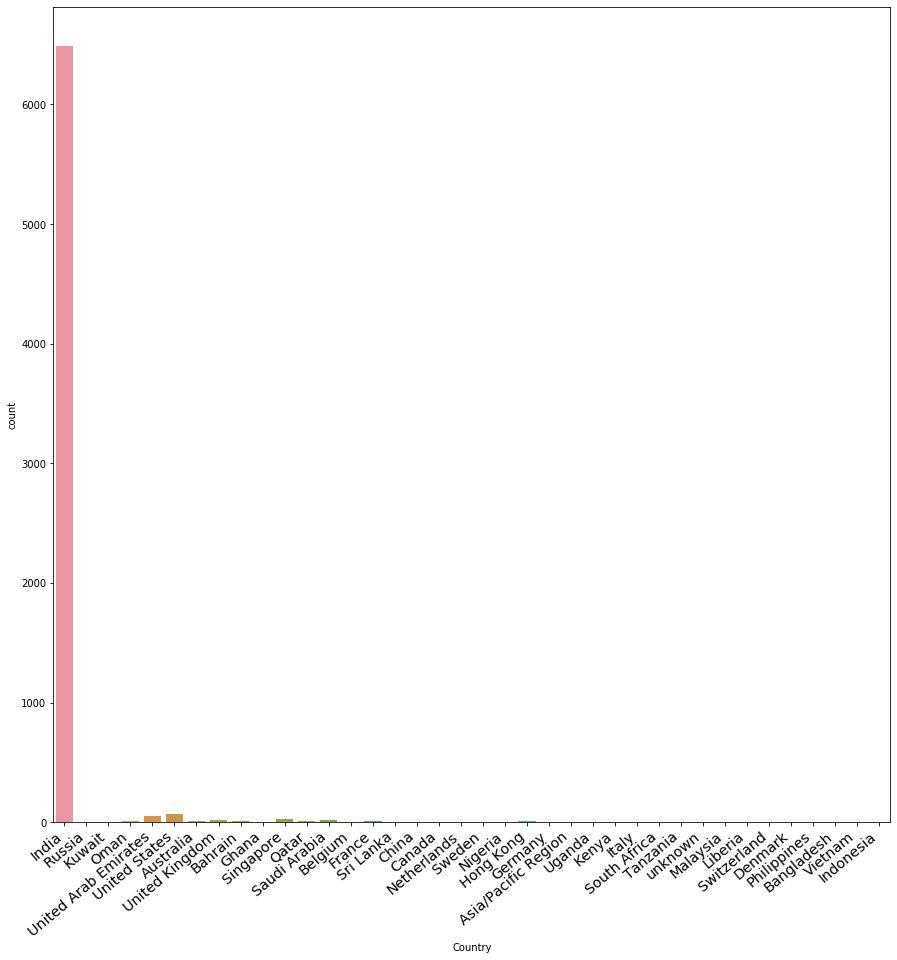

In [118]:
#Plotting Data Counts for Country
fig, axs = plt.subplots(1, figsize = (15,15))
plt1 = sns.countplot(base_data_df['Country'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='x-large')

In [119]:
# City Field
base_data_df['City'].isnull().describe()

count      9240
unique        2
top       False
freq       7820
Name: City, dtype: object

In [120]:
# City Field
base_data_df['City'].describe()

count       7820
unique         7
top       Mumbai
freq        3222
Name: City, dtype: object

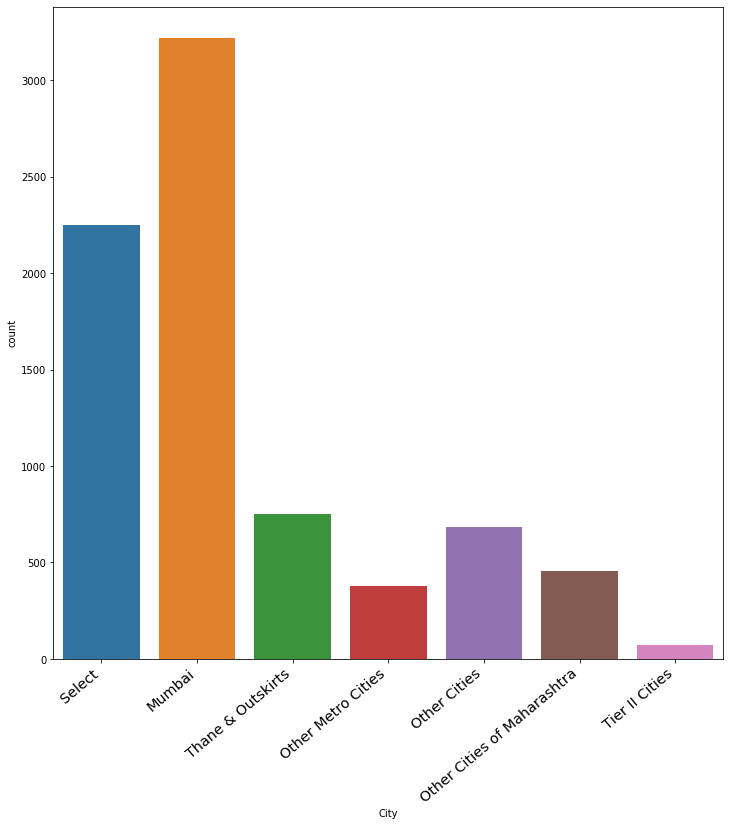

In [121]:
#Plotting Data Counts for City
fig, axs = plt.subplots(1, figsize = (12,12))
plt1 = sns.countplot(base_data_df['City'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='x-large')

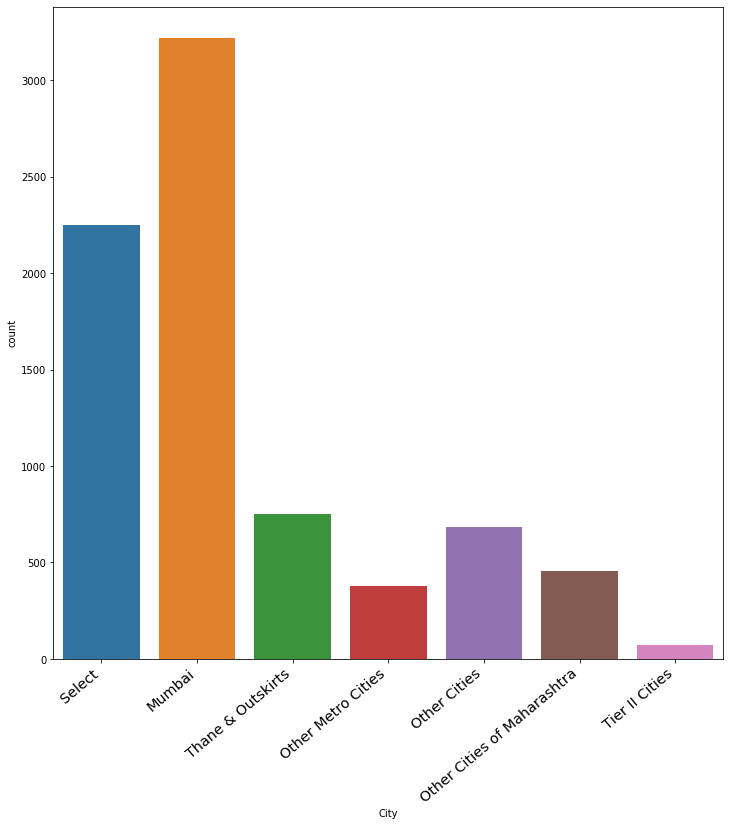

In [122]:
#Plotting Data Counts for City
fig, axs = plt.subplots(1, figsize = (12,12))
plt1 = sns.countplot(base_data_df['City'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='x-large')

In [123]:
# Specialization Field
base_data_df['Specialization'].isnull().describe()

count      9240
unique        2
top       False
freq       7802
Name: Specialization, dtype: object

In [124]:
# Specialization Field
base_data_df['Specialization'].describe()

count       7802
unique        19
top       Select
freq        1942
Name: Specialization, dtype: object

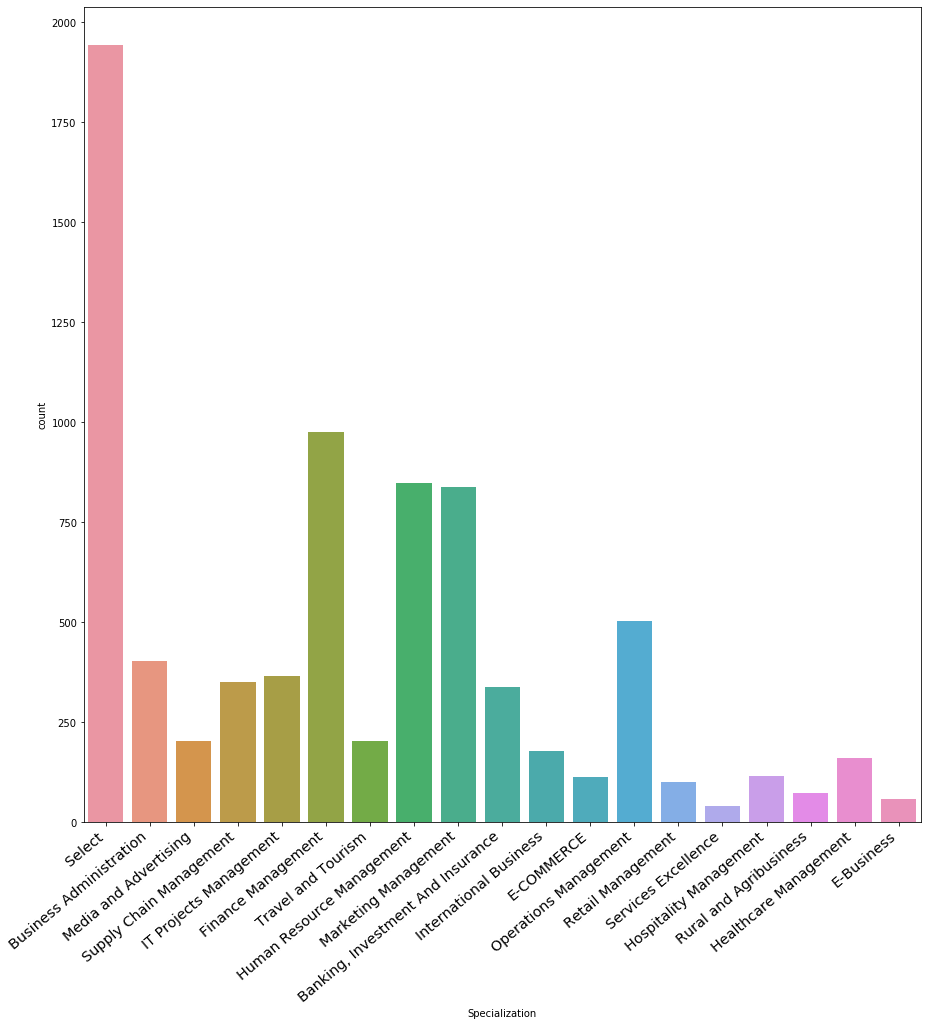

In [125]:
#Plotting Data Counts for Specialization
fig, axs = plt.subplots(1, figsize = (15,15))
plt1 = sns.countplot(base_data_df['Specialization'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='x-large')

In [126]:
# How did you hear about X Education Field
base_data_df['How did you hear about X Education'].isnull().describe()

count      9240
unique        2
top       False
freq       7033
Name: How did you hear about X Education, dtype: object

In [127]:
# How did you hear about X Education Field
base_data_df['How did you hear about X Education'].describe()

count       7033
unique        10
top       Select
freq        5043
Name: How did you hear about X Education, dtype: object

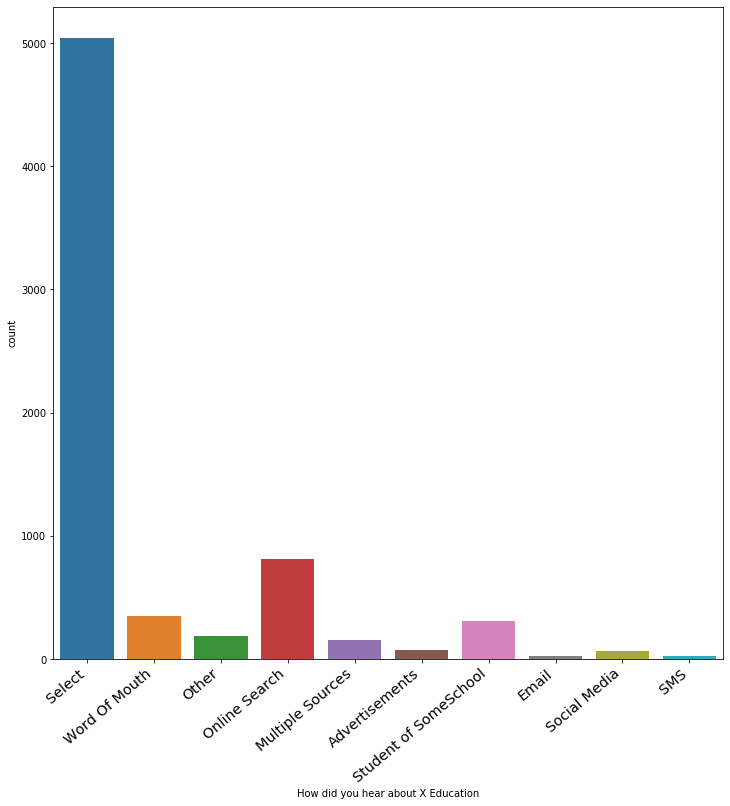

In [128]:
#Plotting Data Counts for How did you hear about X Education
fig, axs = plt.subplots(1, figsize = (12,12))
plt1 = sns.countplot(base_data_df['How did you hear about X Education'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='x-large')

In [129]:
# What is your current occupation Field
base_data_df['What is your current occupation'].isnull().describe()

count      9240
unique        2
top       False
freq       6550
Name: What is your current occupation, dtype: object

In [130]:
# What is your current occupation Field
base_data_df['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

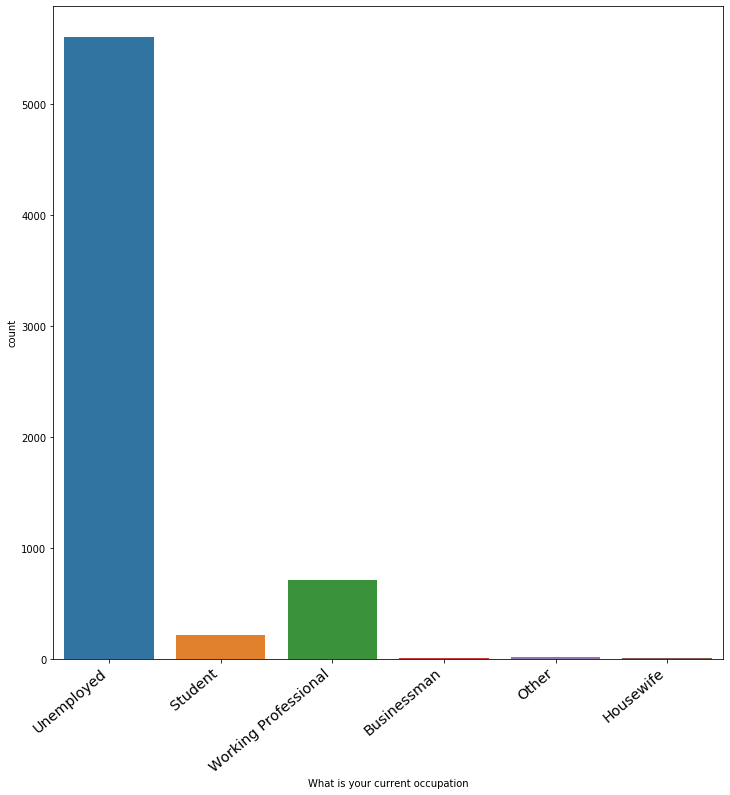

In [131]:
#Plotting Data Counts for What is your current occupation
fig, axs = plt.subplots(1, figsize = (12,12))
plt1 = sns.countplot(base_data_df['What is your current occupation'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='x-large')

In [132]:
#  What matters most to you in choosing a course Field
base_data_df['What matters most to you in choosing a course'].isnull().describe()

count      9240
unique        2
top       False
freq       6531
Name: What matters most to you in choosing a course, dtype: object

In [133]:
#  What matters most to you in choosing a course Field
base_data_df['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

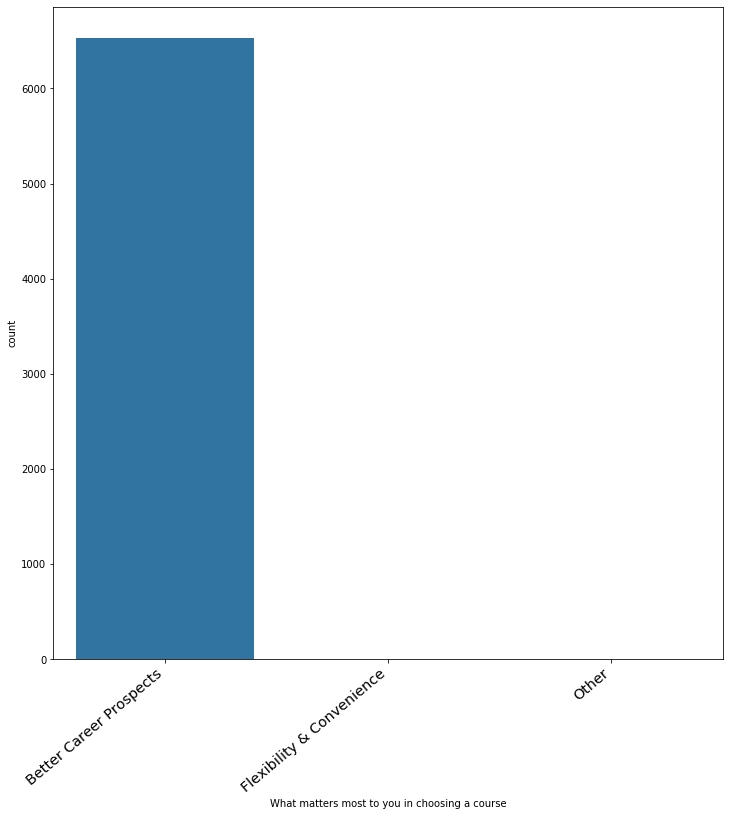

In [134]:
#Plotting Data Counts for What matters most to you in choosing a course
fig, axs = plt.subplots(1, figsize = (12,12))
plt1 = sns.countplot(base_data_df['What matters most to you in choosing a course'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='x-large')

In [135]:
# Tags Field
base_data_df['Tags'].isnull().describe()

count      9240
unique        2
top       False
freq       5887
Name: Tags, dtype: object

In [136]:
# Tags Field
base_data_df['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

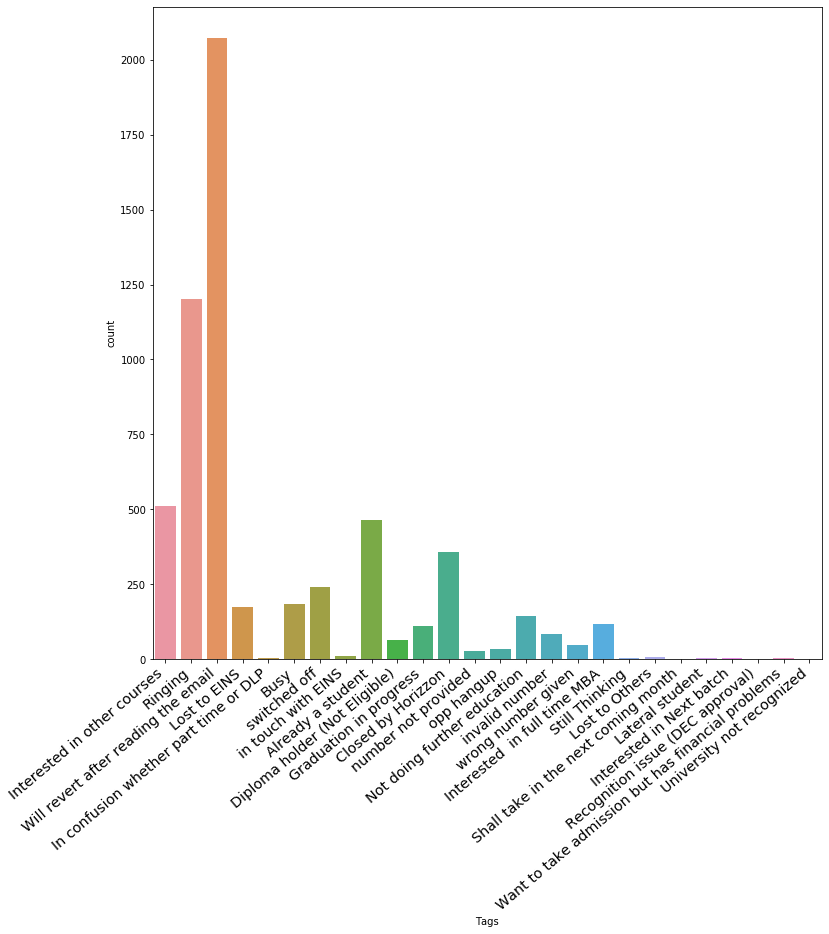

In [137]:
#Plotting Data Counts for Tags
fig, axs = plt.subplots(1, figsize = (12,12))
plt1 = sns.countplot(base_data_df['Tags'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='x-large')

In [138]:
# Lead Profile Field
base_data_df['Lead Profile'].describe()

count       6531
unique         6
top       Select
freq        4146
Name: Lead Profile, dtype: object

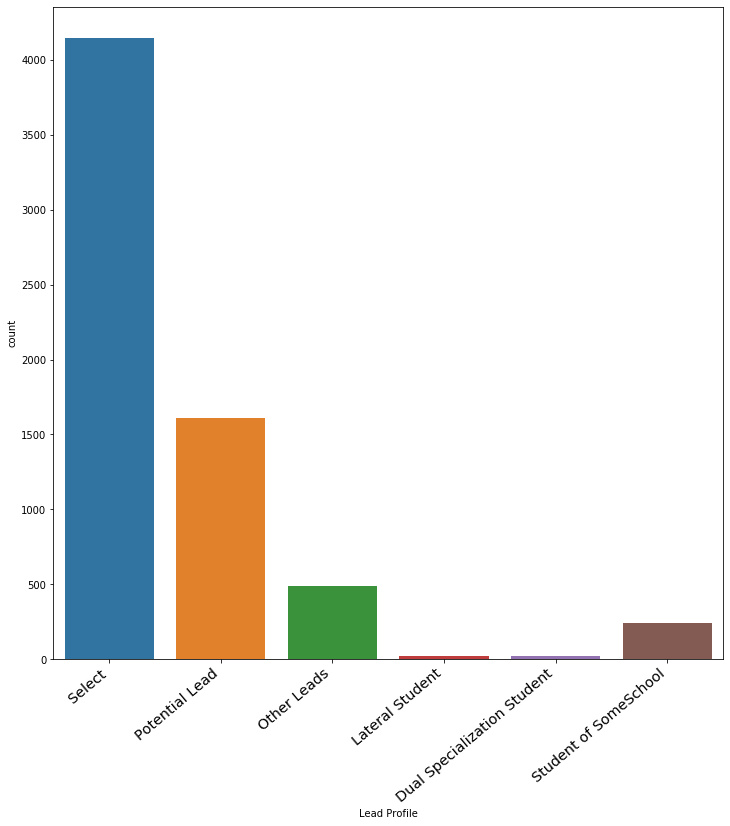

In [139]:
#Plotting Data Counts for Lead Profile
fig, axs = plt.subplots(1, figsize = (12,12))
plt1 = sns.countplot(base_data_df['Lead Profile'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='x-large')

**From the Above Analysis, we can have the following 3 Inferences**

  **1)There are multiple Columns that do not have much Variance in Data i.e. Distinct values in the columns are less, hence they can be dropped** 
  
**2) Columns contain values = "Select", This essentially means that while the User/Customer/Lead did not fill up this part of data. Hence it can be considered as Nulls(Na) values. These Select values can be replaced with Na, across the entire dataset. Then again , Nulls needs to be re analyzed & columns having >45% nulls needs to be dropped**

**3) There are certain rows with Null values, amount to 1-2% of overall data. These data can be dropped, since they won't hamper the overall analysis & model building.**

In [140]:
# Replacing "Select" with Nulls across dataset & Re-analyzing nulls
base_data_df = base_data_df.replace('Select', np.nan)
round(((base_data_df.isnull().sum()/len(base_data_df))*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

**From Above data, lets drop columns with Nulls >=70% and re-analyze**

In [141]:
# Dropping Columns "How did you hear about X Education" & "Lead Profile"
base_data_df=base_data_df.drop(['How did you hear about X Education','Lead Profile'],axis=1)
round(((base_data_df.isnull().sum()/len(base_data_df))*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

**Re-Analyzing/Visualizing Data**

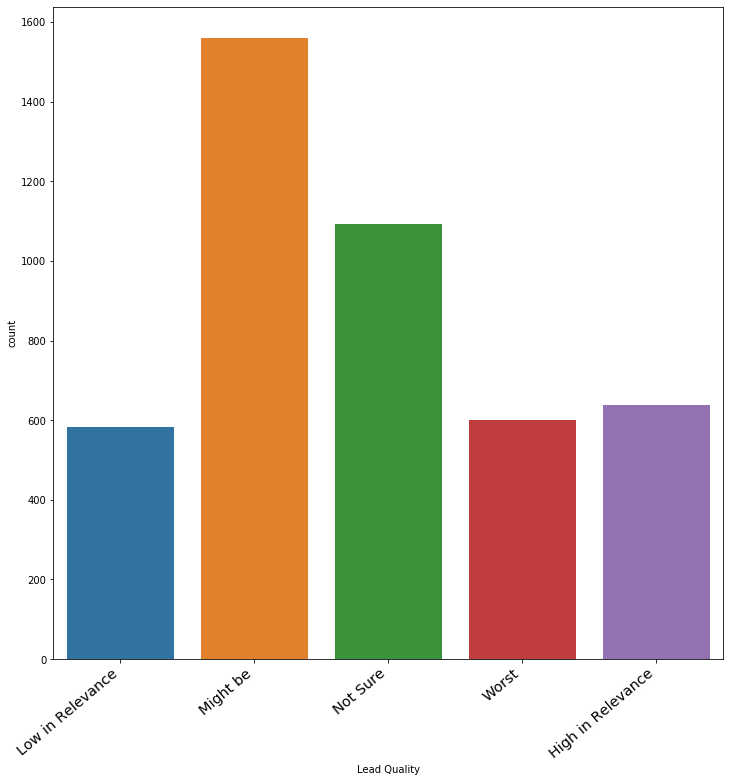

In [142]:
#Plotting Data Counts for Lead Quality
fig, axs = plt.subplots(1, figsize = (12,12))
plt1 = sns.countplot(base_data_df['Lead Quality'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='x-large')

In [143]:
base_data_df['Lead Quality'].isnull().describe()

count     9240
unique       2
top       True
freq      4767
Name: Lead Quality, dtype: object

**From Above Analysis for Lead Quality, it is seen that there are nulls. Since Lead Quality Field is Partially based on the 
Employee's Intuition, we can replace Nulls with "Not Sure"**

In [144]:
# Replacing Nulls in Lead Quality with "Not Sure"
base_data_df['Lead Quality'] = base_data_df['Lead Quality'].replace(np.nan, 'Not Sure')

In [145]:
round(((base_data_df.isnull().sum()/len(base_data_df))*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [146]:
#City has Max Occurence with Mumbai, replacing nulls with Mumbai.
base_data_df['City'] = base_data_df['City'].replace(np.nan, 'Mumbai')
#Country has Max Occurence with India, replacing nulls with India.
base_data_df['Country'] = base_data_df['Country'].replace(np.nan, 'India')

In [147]:
#Specialization Column
base_data_df['Specialization'].isnull().describe()

count      9240
unique        2
top       False
freq       5860
Name: Specialization, dtype: object

In [148]:
#Specialization Column
base_data_df['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [149]:
# From above Analysis for Specialization, we can observer that variation is low & number of nulls are low. 
#Since there is a possibility that the Lead's Acutal Specializaiton was not present it wasn't populated as default.
# Hence replacing Na with Others.
base_data_df['Specialization']=base_data_df['Specialization'].replace(np.nan,'Others')

In [150]:
#Tags Field
base_data_df['Tags'].isnull().describe()

count      9240
unique        2
top       False
freq       5887
Name: Tags, dtype: object

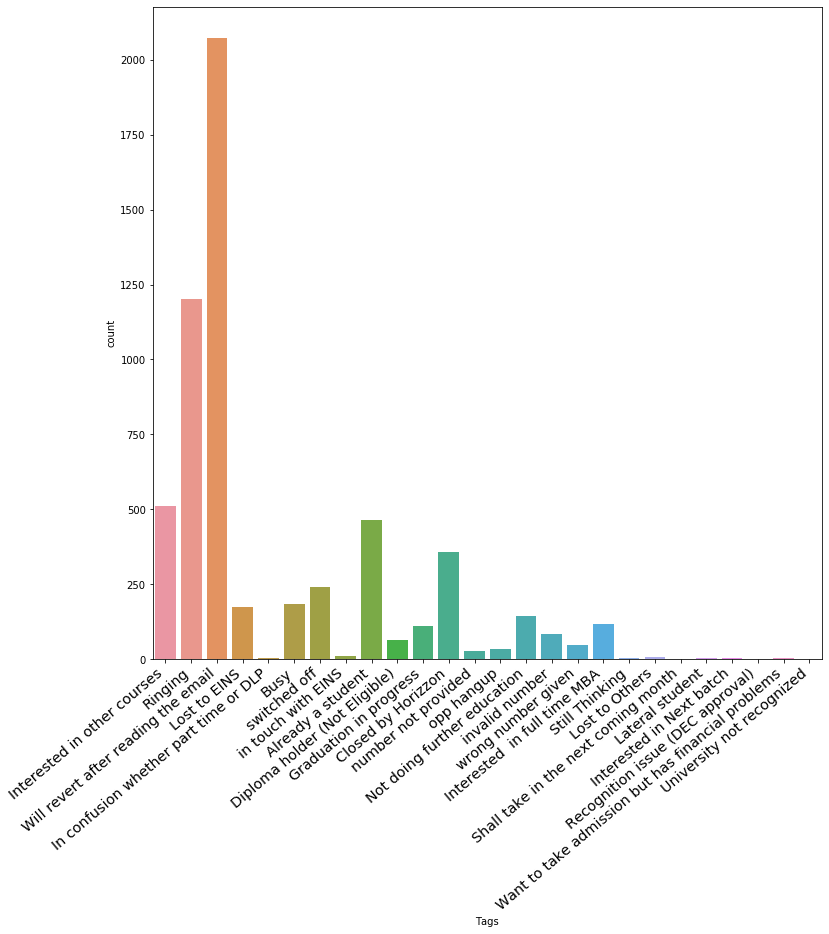

In [151]:
#Plotting Data Counts for Tags
fig, axs = plt.subplots(1, figsize = (12,12))
plt1 = sns.countplot(base_data_df['Tags'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='x-large')

In [152]:
# From above Analysis for Tags, we can observer that variation is high.
# Hence replacing Na with Will Revert after email, since it has maximum occurence.
base_data_df['Tags']=base_data_df['Tags'].replace(np.nan,'Will revert after reading the email')

In [153]:
#Having a Look at nulls again
round(((base_data_df.isnull().sum()/len(base_data_df))*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [154]:
#What is your current occupation
base_data_df['What is your current occupation'].isnull().describe()

count      9240
unique        2
top       False
freq       6550
Name: What is your current occupation, dtype: object

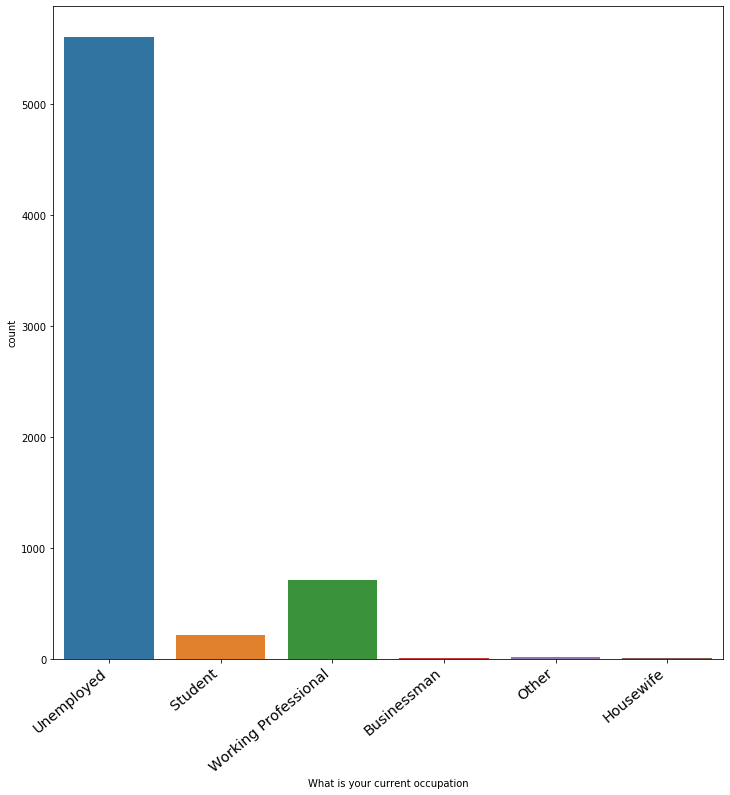

In [155]:
#Plotting Data Counts for What is your current occupation
fig, axs = plt.subplots(1, figsize = (12,12))
plt1 = sns.countplot(base_data_df['What is your current occupation'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='x-large')

In [156]:
# From above Analysis, we can observe that variation is Medium.
# Hence replacing Na with Others.
base_data_df['What is your current occupation']=base_data_df['What is your current occupation'].replace(np.nan,'Other')

In [157]:
#What matters most to you in choosing a course
base_data_df['What matters most to you in choosing a course'].isnull().describe()

count      9240
unique        2
top       False
freq       6531
Name: What matters most to you in choosing a course, dtype: object

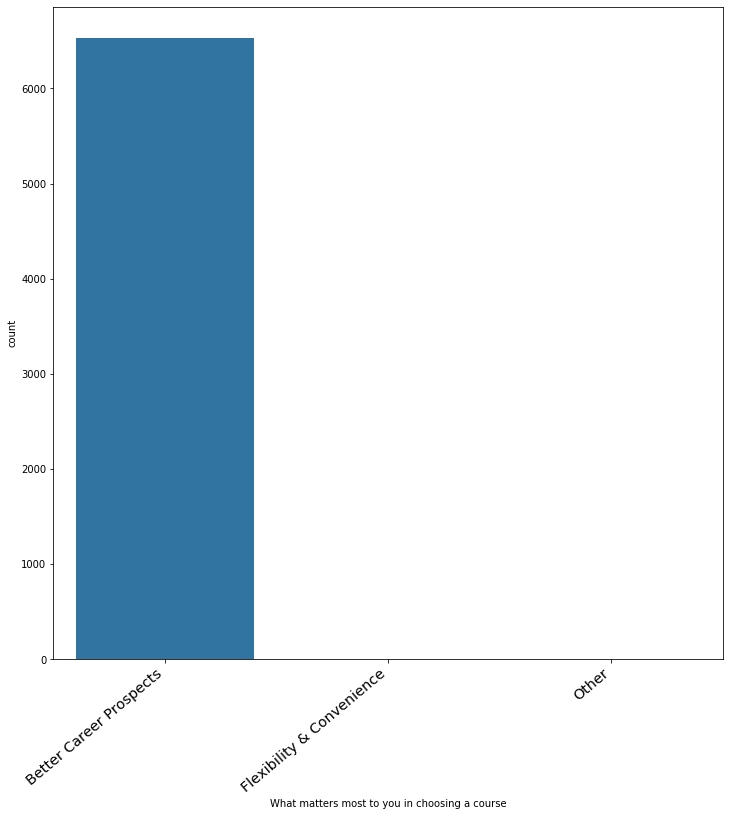

In [158]:
#What matters most to you in choosing a course
fig, axs = plt.subplots(1, figsize = (12,12))
plt1 = sns.countplot(base_data_df['What matters most to you in choosing a course'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='x-large')

In [159]:
# From above Analysis, we can observe that variation is low.
# Hence replacing Na with Better Career Prospects.
base_data_df['What matters most to you in choosing a course']=base_data_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

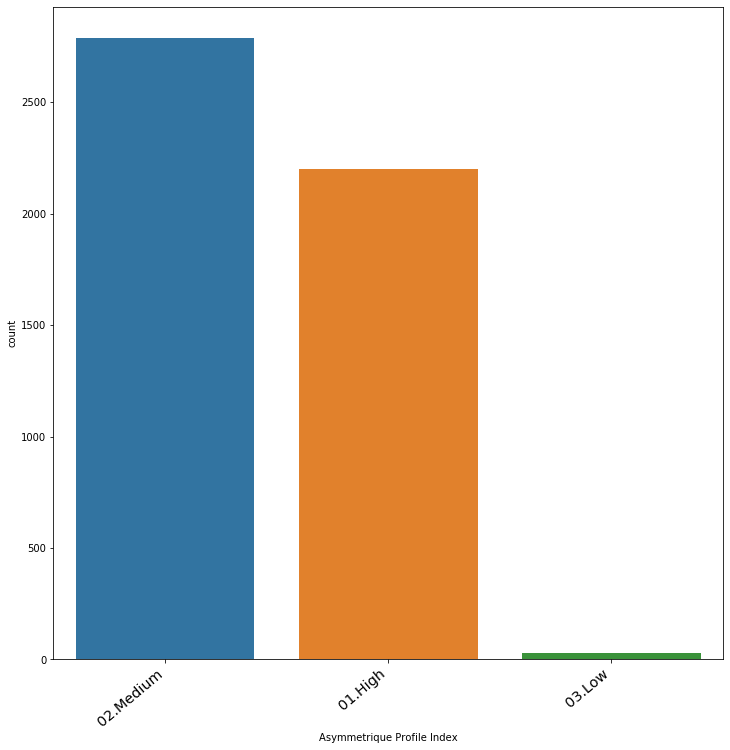

In [160]:
# Asymmetrique Profile/ Activity  Index are categorical columns, viewing data via bar graph
#What matters most to you in choosing a course
fig, axs = plt.subplots(1, figsize = (12,12))
plt1 = sns.countplot(base_data_df['Asymmetrique Profile Index'])
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light', fontsize='x-large')

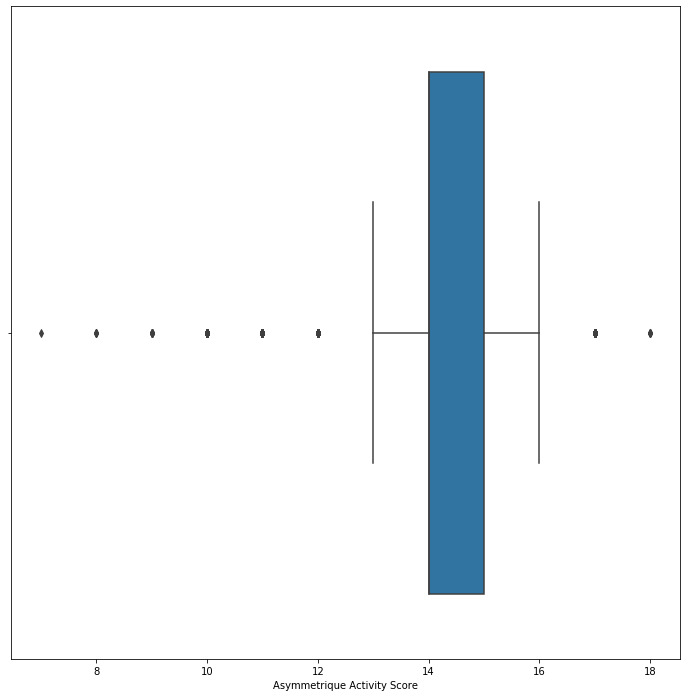

In [161]:
# Asymmetrique Profile/ Activity  Scores are numerical columns, viewing data via boxplot graph
#What matters most to you in choosing a course
fig, axs = plt.subplots(1, figsize = (12,12))
plt2 = sns.boxplot(base_data_df['Asymmetrique Activity Score'])

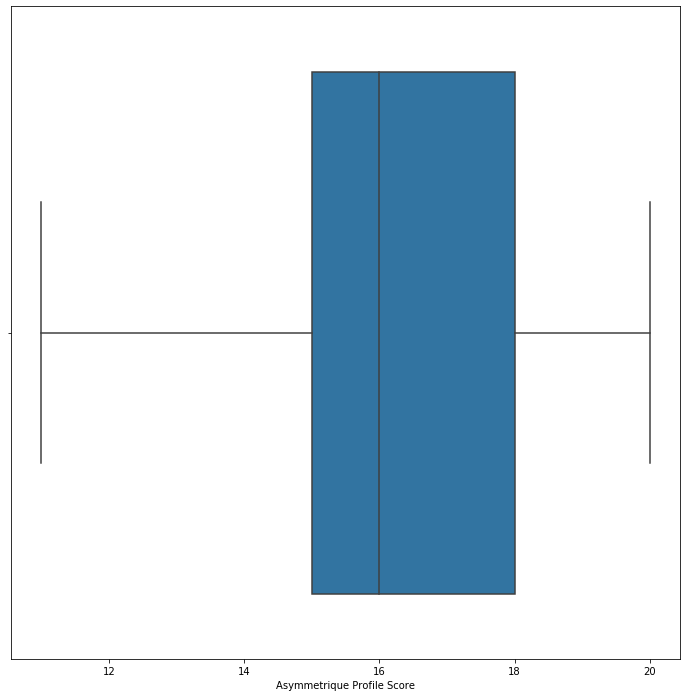

In [162]:
# Asymmetrique Profile/ Activity  Scores are numerical columns, viewing data via boxplot graph
#What matters most to you in choosing a course
fig, axs = plt.subplots(1, figsize = (12,12))
plt2 = sns.boxplot(base_data_df['Asymmetrique Profile Score'])

**From Above analysis for Asymmetrique Profile/Activity Index/Scores, in Index,major data points are Pointing to Medium & Scores have heavy Outliers. The Columns don't have much variations & are having around 46% nulls. 
Imputing with any numeric values in Scores might cause addition to outliers & in case of Index, the model might deviate since the maximum occurence is type 'Medium'.**

**Hence considering these columns as insignificant and considering it for Dropping.**

**From Above over all Analysis, the following columns can be considered for Dropping,since they have least variations**

**1) Country**
**2) City**
**3) What matters most to you in choosing a course**
**4) Asymmetrique Activity Index**
**5) Asymmetrique Activity Score**
**6) Asymmetrique Profile Index**
**7) Asymmetrique Profile Score**

In [163]:
#Dropping Columns
base_data_df=base_data_df.drop(['Country','Asymmetrique Activity Index','Asymmetrique Activity Score',
                   'Asymmetrique Profile Index','Asymmetrique Profile Score','City','What matters most to you in choosing a course'],axis=1)

In [164]:
#Dropping all rows, with 0%<nulls<2%
base_data_df.dropna(inplace = True)

In [165]:
# Analyzing Dataset
base_data_df.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                              

In [166]:
base_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
Prospect ID                                 9074 non-null object
Lead Number                                 9074 non-null int64
Lead Origin                                 9074 non-null object
Lead Source                                 9074 non-null object
Do Not Email                                9074 non-null object
Do Not Call                                 9074 non-null object
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
Last Activity                               9074 non-null object
Specialization                              9074 non-null object
What is your current occupation             9074 non-null object
Search                                      9074 

**As per Given Data Dictionary, it can be seen that both Prospect ID & Lead number are unique identifiers for Customers/Leads.**

**Analzing these columns for duplicates**

In [167]:
base_data_df['Lead Number'].head()

0    660737
1    660728
2    660727
3    660719
4    660681
Name: Lead Number, dtype: int64

In [168]:
base_data_df['Prospect ID'].head()

0    7927b2df-8bba-4d29-b9a2-b6e0beafe620
1    2a272436-5132-4136-86fa-dcc88c88f482
2    8cc8c611-a219-4f35-ad23-fdfd2656bd8a
3    0cc2df48-7cf4-4e39-9de9-19797f9b38cc
4    3256f628-e534-4826-9d63-4a8b88782852
Name: Prospect ID, dtype: object

In [169]:
# Analyzing for Duplicates in Columns Prospect ID
base_data_df[base_data_df['Prospect ID'].duplicated( keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [170]:
# Analyzing for Duplicates in Columns Lead Number
base_data_df[base_data_df['Lead Number'].duplicated( keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


**From above analysis, both the columns have unique,non-repeating values we can drop one of the columns & maintain only one column as unique identifier**
**Dropping Lead Number column, since it has only numeric values**

In [171]:
# Dropping Lead Number  Column
base_data_df=base_data_df.drop(['Lead Number'],axis=1)
base_data_df.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

**Analyzing Other Columns,With Respect to Converted, since Converted is the target variable**

In [172]:
# Mapping Binary Columns to 1/0 

varlist =  ['Do Not Email','Do Not Call','Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Mapping Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})


base_data_df[varlist] = base_data_df[varlist].apply(binary_map)

In [173]:
base_data_df['Search'].groupby(base_data_df['Converted']).value_counts()

Converted  Search
0          0         5630
           1            9
1          0         3430
           1            5
Name: Search, dtype: int64

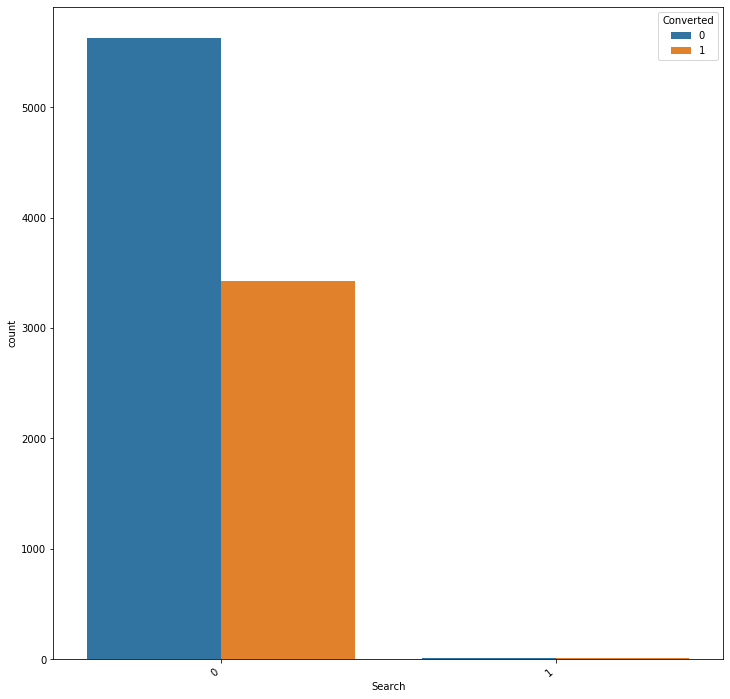

In [174]:
fig, axs = plt.subplots(1, figsize = (12,12))
plt1 = sns.countplot(x = "Search", hue = "Converted", data = base_data_df)
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40,horizontalalignment='right',fontweight='light')

In [175]:
base_data_df['Magazine'].groupby(base_data_df['Converted']).value_counts()

Converted  Magazine
0          0           5639
1          0           3435
Name: Magazine, dtype: int64

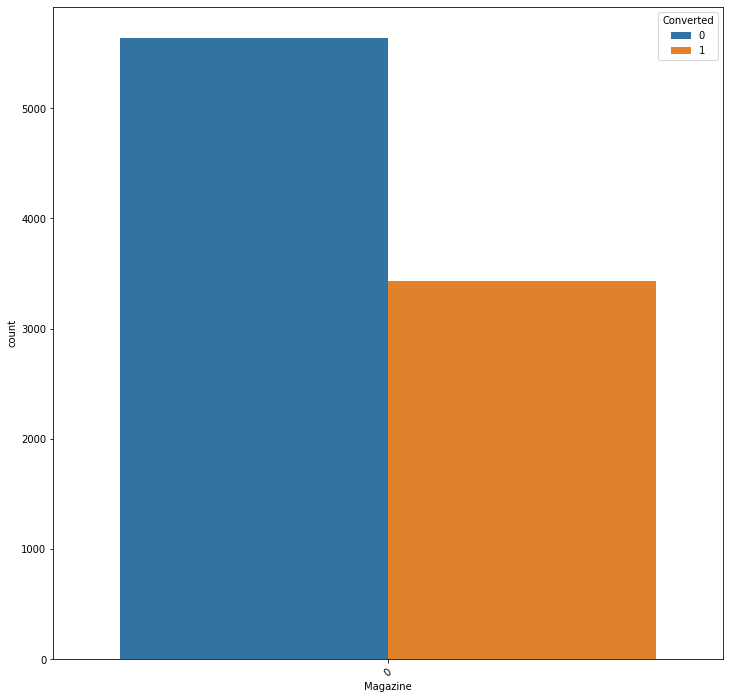

In [176]:
fig, axs = plt.subplots(1, figsize = (12,12))
plt1 = sns.countplot(x = "Magazine", hue = "Converted", data = base_data_df)
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40)

In [177]:
base_data_df['Newspaper Article'].groupby(base_data_df['Converted']).value_counts()

Converted  Newspaper Article
0          0                    5638
           1                       1
1          0                    3434
           1                       1
Name: Newspaper Article, dtype: int64

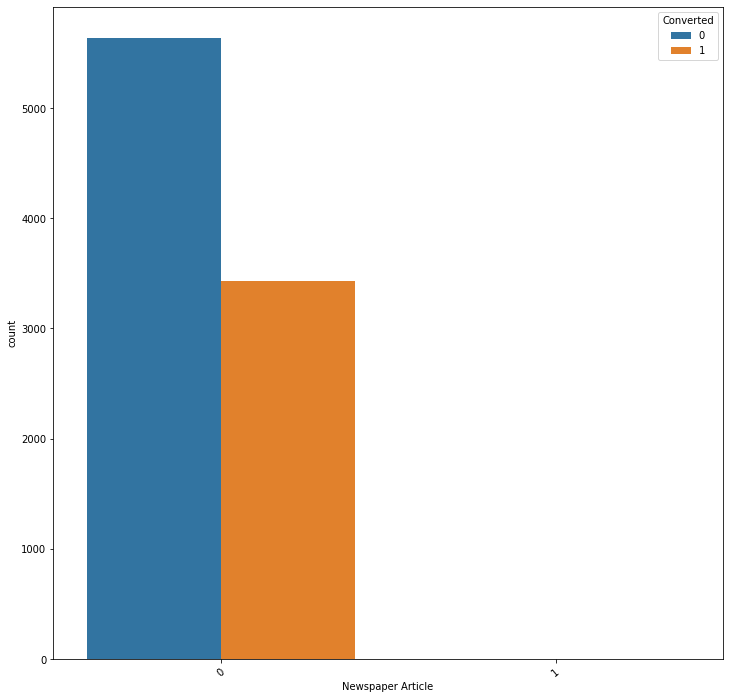

In [178]:
fig, axs = plt.subplots(1, figsize = (12,12))
plt1 = sns.countplot(x = "Newspaper Article", hue = "Converted", data = base_data_df)
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40)

In [179]:
base_data_df['X Education Forums'].groupby(base_data_df['Converted']).value_counts()

Converted  X Education Forums
0          0                     5638
           1                        1
1          0                     3435
Name: X Education Forums, dtype: int64

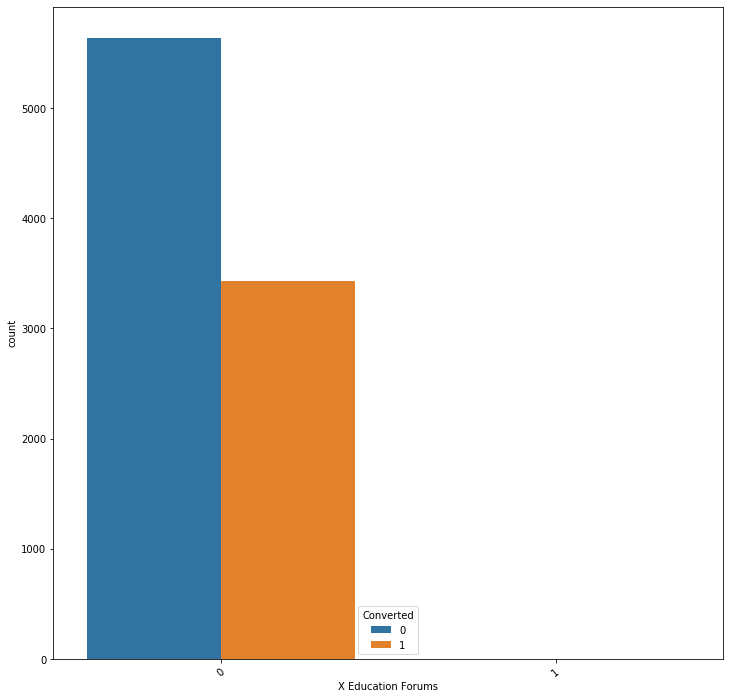

In [180]:
fig, axs = plt.subplots(1, figsize = (12,12))
plt1 = sns.countplot(x = "X Education Forums", hue = "Converted", data = base_data_df)
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40)

In [181]:
base_data_df['Digital Advertisement'].groupby(base_data_df['Converted']).value_counts()

Converted  Digital Advertisement
0          0                        5636
           1                           3
1          0                        3434
           1                           1
Name: Digital Advertisement, dtype: int64

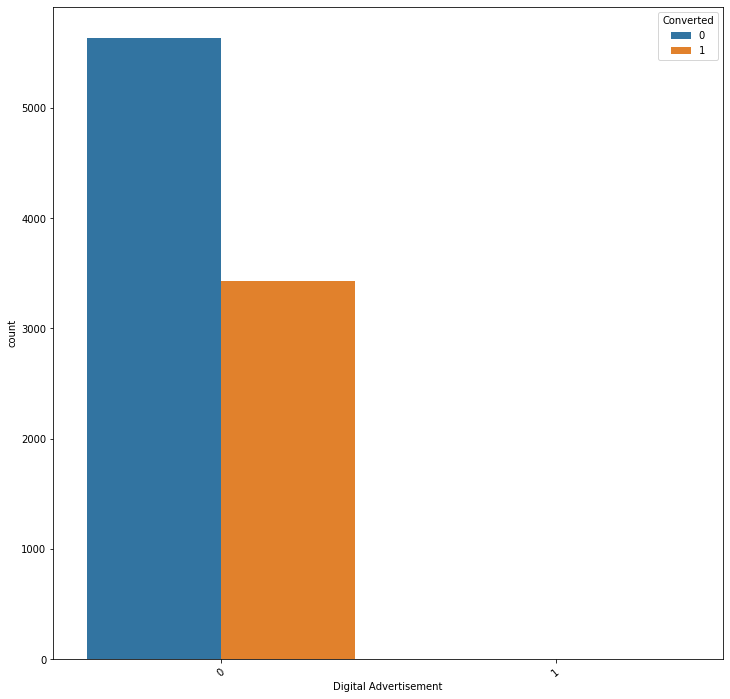

In [182]:
fig, axs = plt.subplots(1, figsize = (12,12))
plt1 = sns.countplot(x = "Digital Advertisement", hue = "Converted", data = base_data_df)
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40)

In [183]:
base_data_df['Through Recommendations'].groupby(base_data_df['Converted']).value_counts()

Converted  Through Recommendations
0          0                          5637
           1                             2
1          0                          3430
           1                             5
Name: Through Recommendations, dtype: int64

In [184]:
base_data_df['Receive More Updates About Our Courses'].groupby(base_data_df['Converted']).value_counts()

Converted  Receive More Updates About Our Courses
0          0                                         5639
1          0                                         3435
Name: Receive More Updates About Our Courses, dtype: int64

In [185]:
base_data_df['Update me on Supply Chain Content'].groupby(base_data_df['Converted']).value_counts()

Converted  Update me on Supply Chain Content
0          0                                    5639
1          0                                    3435
Name: Update me on Supply Chain Content, dtype: int64

In [186]:
base_data_df['Get updates on DM Content'].groupby(base_data_df['Converted']).value_counts()

Converted  Get updates on DM Content
0          0                            5639
1          0                            3435
Name: Get updates on DM Content, dtype: int64

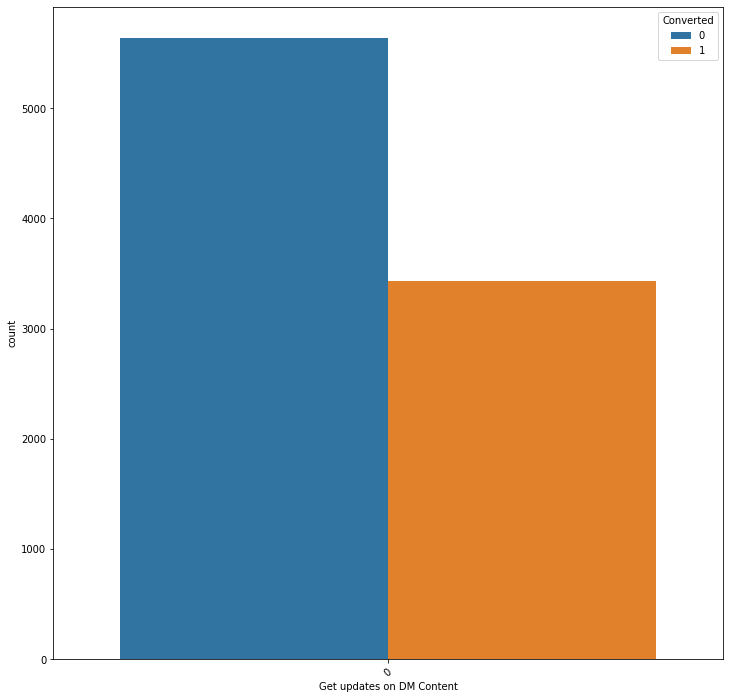

In [187]:
fig, axs = plt.subplots(1, figsize = (12,12))
plt1 = sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = base_data_df)
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40)

In [188]:
base_data_df['Through Recommendations'].groupby(base_data_df['Converted']).value_counts()

Converted  Through Recommendations
0          0                          5637
           1                             2
1          0                          3430
           1                             5
Name: Through Recommendations, dtype: int64

In [189]:
base_data_df['Receive More Updates About Our Courses'].groupby(base_data_df['Converted']).value_counts()

Converted  Receive More Updates About Our Courses
0          0                                         5639
1          0                                         3435
Name: Receive More Updates About Our Courses, dtype: int64

In [190]:
base_data_df['Get updates on DM Content'].groupby(base_data_df['Converted']).value_counts()

Converted  Get updates on DM Content
0          0                            5639
1          0                            3435
Name: Get updates on DM Content, dtype: int64

In [191]:
base_data_df['Update me on Supply Chain Content'].groupby(base_data_df['Converted']).value_counts()

Converted  Update me on Supply Chain Content
0          0                                    5639
1          0                                    3435
Name: Update me on Supply Chain Content, dtype: int64

In [192]:
base_data_df['Lead Origin'].groupby(base_data_df['Converted']).value_counts()

Converted  Lead Origin            
0          Landing Page Submission    3118
           API                        2463
           Lead Add Form                37
           Lead Import                  21
1          Landing Page Submission    1767
           API                        1115
           Lead Add Form               544
           Lead Import                   9
Name: Lead Origin, dtype: int64

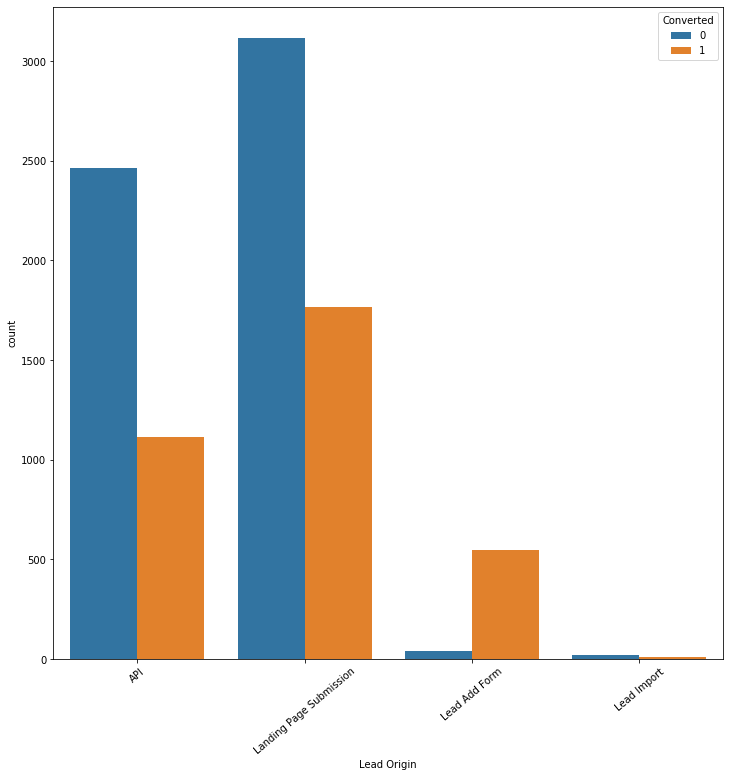

In [193]:
fig, axs = plt.subplots(1, figsize = (12,12))
plt1 = sns.countplot(x = "Lead Origin", hue = "Converted", data = base_data_df)
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40)

In [194]:
base_data_df['Do Not Email'].groupby(base_data_df['Converted']).value_counts()

Converted  Do Not Email
0          0               5027
           1                612
1          0               3331
           1                104
Name: Do Not Email, dtype: int64

In [195]:
base_data_df['Do Not Call'].groupby(base_data_df['Converted']).value_counts()

Converted  Do Not Call
0          0              5639
1          0              3433
           1                 2
Name: Do Not Call, dtype: int64

In [196]:
base_data_df['A free copy of Mastering The Interview'].groupby(base_data_df['Converted']).value_counts()

Converted  A free copy of Mastering The Interview
0          0                                         3781
           1                                         1858
1          0                                         2405
           1                                         1030
Name: A free copy of Mastering The Interview, dtype: int64

In [197]:
base_data_df['I agree to pay the amount through cheque'].groupby(base_data_df['Converted']).value_counts()

Converted  I agree to pay the amount through cheque
0          0                                           5639
1          0                                           3435
Name: I agree to pay the amount through cheque, dtype: int64

**From Above Analysis, it is seen that the Columns least contribute/participate in lead conversion,except for Lead Origin & Do Not Email. Hence we can drop these columns,except for Lead Origin & Do Not Email**

In [198]:
base_data_df=base_data_df.drop(['Digital Advertisement','Through Recommendations',
                                'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                                'Get updates on DM Content','Search','Magazine','Newspaper Article','X Education Forums',
                                'Newspaper','Do Not Call','I agree to pay the amount through cheque','A free copy of Mastering The Interview'],axis=1)

In [199]:
# Viewing the final dataset
base_data_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Modified


In [200]:
base_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
Prospect ID                        9074 non-null object
Lead Origin                        9074 non-null object
Lead Source                        9074 non-null object
Do Not Email                       9074 non-null int64
Converted                          9074 non-null int64
TotalVisits                        9074 non-null float64
Total Time Spent on Website        9074 non-null int64
Page Views Per Visit               9074 non-null float64
Last Activity                      9074 non-null object
Specialization                     9074 non-null object
What is your current occupation    9074 non-null object
Tags                               9074 non-null object
Lead Quality                       9074 non-null object
Last Notable Activity              9074 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 1.4+ MB


In [201]:
base_data_df.describe()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.078907,0.378554,3.456028,482.887481,2.370151
std,0.269608,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,11.000000,1.000000
50%,0.000000,0.000000,3.000000,246.000000,2.000000
75%,0.000000,1.000000,5.000000,922.750000,3.200000
max,1.000000,1.000000,251.000000,2272.000000,55.000000


In [202]:
base_data_df.isnull().sum()

Prospect ID                        0
Lead Origin                        0
Lead Source                        0
Do Not Email                       0
Converted                          0
TotalVisits                        0
Total Time Spent on Website        0
Page Views Per Visit               0
Last Activity                      0
Specialization                     0
What is your current occupation    0
Tags                               0
Lead Quality                       0
Last Notable Activity              0
dtype: int64

In [203]:
# Viewing data in Columns Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Last Notable Activity
# To identify Data Discrepancies
base_data_df['Lead Origin'].groupby(base_data_df['Lead Origin']).value_counts()

Lead Origin              Lead Origin            
API                      API                        3578
Landing Page Submission  Landing Page Submission    4885
Lead Add Form            Lead Add Form               581
Lead Import              Lead Import                  30
Name: Lead Origin, dtype: int64

In [204]:
base_data_df['Lead Source'].groupby(base_data_df['Lead Source']).value_counts()

Lead Source        Lead Source      
Click2call         Click2call              4
Direct Traffic     Direct Traffic       2543
Facebook           Facebook               31
Google             Google               2868
Live Chat          Live Chat               2
NC_EDM             NC_EDM                  1
Olark Chat         Olark Chat           1753
Organic Search     Organic Search       1154
Pay per Click Ads  Pay per Click Ads       1
Press_Release      Press_Release           2
Reference          Reference             443
Referral Sites     Referral Sites        125
Social Media       Social Media            2
WeLearn            WeLearn                 1
Welingak Website   Welingak Website      129
bing               bing                    6
blog               blog                    1
google             google                  5
testone            testone                 1
welearnblog_Home   welearnblog_Home        1
youtubechannel     youtubechannel          1
Name: Lead Source,

**From Lead Source Analysis, we can draw the following inferences**

**1) Google & google are same, with different Capitalism,they can be merged into 1**

**2) Google,Organic Search & bing can be merged into single Block as "Search Engines"**

**3) Facebook,Social Media can be merged into "Social Media"**

**4) blog & welearnblog_Home can be merged into "Blogs"**

**5) Live chat & Olark Chat  can be merged into "Chat Engines"**

**6) References & Referral Sites   can be merged into "Refernces"**

**7) Rest with lower counts   can be merged into "Others"**

In [205]:
#Replace google with Google
base_data_df['Lead Source'] = base_data_df['Lead Source'].replace(['google'], 'Google')

In [206]:
#Merging Google,Organic Search,bing with Search Engines
base_data_df['Lead Source'] = base_data_df['Lead Source'].replace(['Google', 'Organic Search','bing'], 'Search Engines')

In [207]:
#Merging Facebook,Social Media with Social Media
base_data_df['Lead Source'] = base_data_df['Lead Source'].replace(['Facebook', 'Social Media'], 'Social Media')

In [208]:
#Merging blog & welearnblog_Home with Blogs
base_data_df['Lead Source'] = base_data_df['Lead Source'].replace(['blog', 'welearnblog_Home'], 'Blogs')

In [209]:
#Merging References, Rereral Sites with Refernces
base_data_df['Lead Source'] = base_data_df['Lead Source'].replace(['Reference', 'Referral Sites'], 'Refernces')

In [210]:
#Merging Live chat, Olark Chat with Chat Engine
base_data_df['Lead Source'] = base_data_df['Lead Source'].replace(['Olark Chat', 'Live Chat'], 'Chat Engine')

In [211]:
#Merging remaining data rows  with smaller counts  {Click2call,NC_EDM,Pay per Click Ads,Press_Release,WeLearn,Welingak Website,testone,youtubechannel} to Others  
base_data_df['Lead Source'] = base_data_df['Lead Source'].replace(['Click2call', 'NC_EDM','Pay per Click Ads','Press_Release','WeLearn','Welingak Website','testone','youtubechannel'], 'Others')

In [212]:
base_data_df['Lead Source'].groupby(base_data_df['Lead Source']).value_counts()

Lead Source     Lead Source   
Blogs           Blogs                2
Chat Engine     Chat Engine       1755
Direct Traffic  Direct Traffic    2543
Others          Others             140
Refernces       Refernces          568
Search Engines  Search Engines    4033
Social Media    Social Media        33
Name: Lead Source, dtype: int64

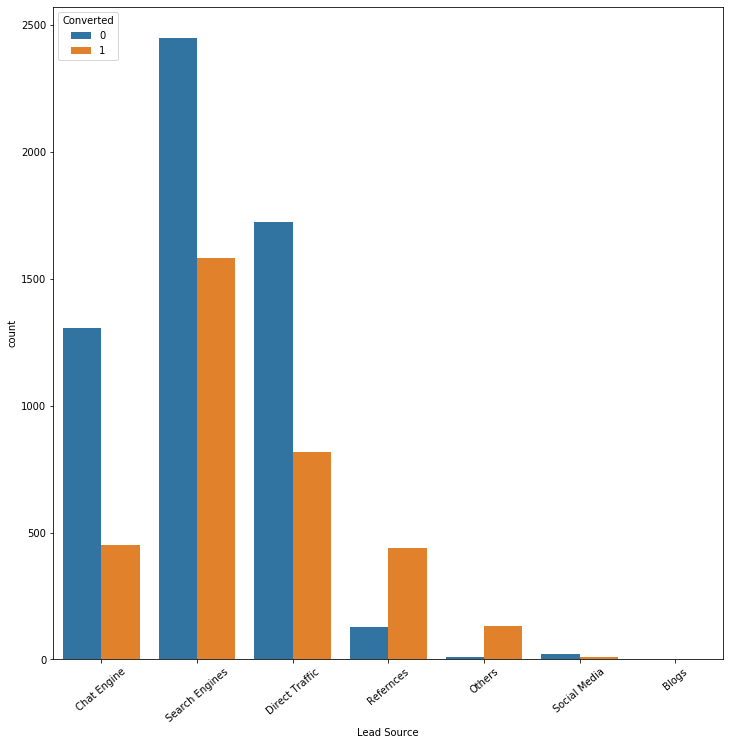

In [213]:
fig, axs = plt.subplots(1, figsize = (12,12))
plt1 = sns.countplot(x = "Lead Source", hue = "Converted", data = base_data_df)
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40)

In [214]:
base_data_df['Lead Source'].groupby(base_data_df['Converted']).value_counts()

Converted  Lead Source   
0          Search Engines    2449
           Direct Traffic    1725
           Chat Engine       1305
           Refernces          127
           Social Media        23
           Others               8
           Blogs                2
1          Search Engines    1584
           Direct Traffic     818
           Chat Engine        450
           Refernces          441
           Others             132
           Social Media        10
Name: Lead Source, dtype: int64

In [215]:
base_data_df['Last Activity'].groupby(base_data_df['Last Activity']).value_counts()

Last Activity                 Last Activity               
Approached upfront            Approached upfront                 5
Converted to Lead             Converted to Lead                428
Email Bounced                 Email Bounced                    312
Email Link Clicked            Email Link Clicked               267
Email Marked Spam             Email Marked Spam                  2
Email Opened                  Email Opened                    3432
Email Received                Email Received                     2
Form Submitted on Website     Form Submitted on Website        116
Had a Phone Conversation      Had a Phone Conversation          25
Olark Chat Conversation       Olark Chat Conversation          972
Page Visited on Website       Page Visited on Website          640
Resubscribed to emails        Resubscribed to emails             1
SMS Sent                      SMS Sent                        2716
Unreachable                   Unreachable                       90
Uns

In [216]:
base_data_df['Last Activity'].groupby(base_data_df['Converted']).value_counts()

Converted  Last Activity               
0          Email Opened                    2182
           SMS Sent                        1011
           Olark Chat Conversation          888
           Page Visited on Website          489
           Converted to Lead                374
           Email Bounced                    296
           Email Link Clicked               194
           Form Submitted on Website         88
           Unreachable                       61
           Unsubscribed                      45
           Had a Phone Conversation           5
           View in browser link Clicked       5
           Visited Booth in Tradeshow         1
1          SMS Sent                        1705
           Email Opened                    1250
           Page Visited on Website          151
           Olark Chat Conversation           84
           Email Link Clicked                73
           Converted to Lead                 54
           Unreachable                       29


In [217]:
base_data_df['What is your current occupation'].groupby(base_data_df['What is your current occupation']).value_counts()

What is your current occupation  What is your current occupation
Businessman                      Businessman                           8
Housewife                        Housewife                             9
Other                            Other                              2698
Student                          Student                             206
Unemployed                       Unemployed                         5476
Working Professional             Working Professional                677
Name: What is your current occupation, dtype: int64

In [218]:
base_data_df['What is your current occupation'].groupby(base_data_df['Converted']).value_counts()

Converted  What is your current occupation
0          Unemployed                         3130
           Other                              2319
           Student                             132
           Working Professional                 55
           Businessman                           3
1          Unemployed                         2346
           Working Professional                622
           Other                               379
           Student                              74
           Housewife                             9
           Businessman                           5
Name: What is your current occupation, dtype: int64

In [219]:
base_data_df['Tags'].groupby(base_data_df['Tags']).value_counts()

Tags                                               Tags                                             
Already a student                                  Already a student                                     465
Busy                                               Busy                                                  185
Closed by Horizzon                                 Closed by Horizzon                                    301
Diploma holder (Not Eligible)                      Diploma holder (Not Eligible)                          63
Graduation in progress                             Graduation in progress                                111
In confusion whether part time or DLP              In confusion whether part time or DLP                   5
Interested  in full time MBA                       Interested  in full time MBA                          116
Interested in Next batch                           Interested in Next batch                                5
Interested in other courses

**From Above Analysis for Tags, following are the References**

**1) wrong number given,number not provided,invalid number,Ringing can be merged into "Not Contactable"**

**2) Shall take in the next coming month,Interested in Next batch can be merged into "Interested in Next batch"**

**3) Diploma holder (Not Eligible) ,Not doing further education can be merged into "Not Eligible"**

**4) Lost to EINS ,Lost to Others,in touch with EINS can be merged into "Lost Leads"**

In [220]:
#Merging wrong number given,number not provided,invalid number,Ringing with Not Contactable
base_data_df['Tags'] = base_data_df['Tags'].replace(['wrong number given','Ringing','number not provided','invalid number','switched off','opp hangup']
                                                    , 'Not Contactable')

In [221]:
#Merging Shall take in the next coming month,Interested in Next batch with Interested in Next batch
base_data_df['Tags'] = base_data_df['Tags'].replace(['Shall take in the next coming month','Interested in Next batch'],'Interested in Next batch')

In [222]:
#Merging Diploma holder (Not Eligible),Not doing further education with Not Eligible
base_data_df['Tags'] = base_data_df['Tags'].replace(['Diploma holder (Not Eligible)','Not doing further education'],'Not Eligible')

In [223]:
#Merging Lost to EINS ,Lost to Others,in touch with EINS with Lost Leads
base_data_df['Tags'] = base_data_df['Tags'].replace(['in touch with EINS','Lost to Others','Lost to EINS'],'Lost Leads')

In [224]:
base_data_df['Tags'].groupby(base_data_df['Tags']).value_counts()

Tags                                               Tags                                             
Already a student                                  Already a student                                     465
Busy                                               Busy                                                  185
Closed by Horizzon                                 Closed by Horizzon                                    301
Graduation in progress                             Graduation in progress                                111
In confusion whether part time or DLP              In confusion whether part time or DLP                   5
Interested  in full time MBA                       Interested  in full time MBA                          116
Interested in Next batch                           Interested in Next batch                                7
Interested in other courses                        Interested in other courses                           509
Lateral student            

In [225]:
base_data_df['Tags'].groupby(base_data_df['Converted']).value_counts()

Converted  Tags                                             
0          Will revert after reading the email                  2566
           Not Contactable                                      1573
           Interested in other courses                           496
           Already a student                                     462
           Not Eligible                                          206
           Interested  in full time MBA                          113
           Graduation in progress                                104
           Busy                                                   80
           Lost Leads                                             20
           Still Thinking                                          5
           In confusion whether part time or DLP                   4
           Want to take admission but has financial problems       4
           Closed by Horizzon                                      2
           University not recognized      

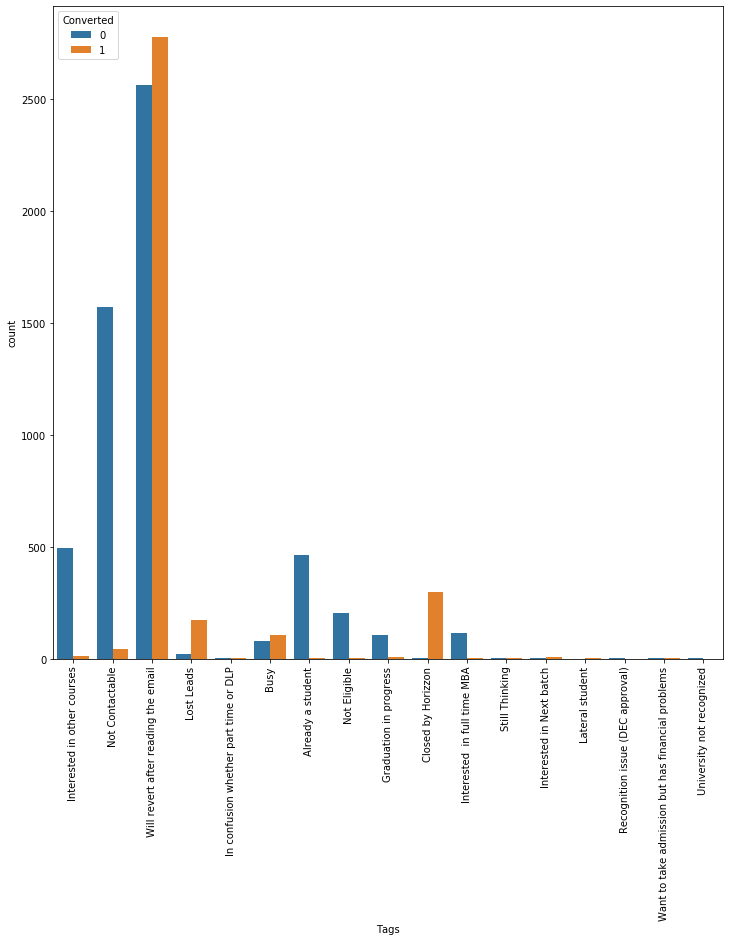

In [226]:
fig, axs = plt.subplots(1, figsize = (12,12))
plt1 = sns.countplot(x = "Tags", hue = "Converted", data = base_data_df)
plt1=plt1.set_xticklabels(plt1.get_xticklabels(), rotation=90)

**Outlier Analysis**

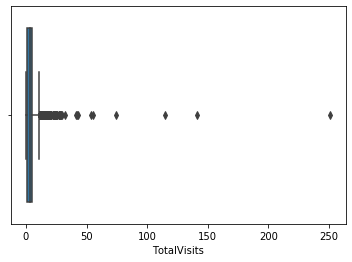

In [227]:
#Analyzing Outliers for TotalVisits
sns.boxplot(base_data_df['TotalVisits'])

**Not Dropping Outliers here since it is causing dropping of huge count of data rows, from 9074 to 400**

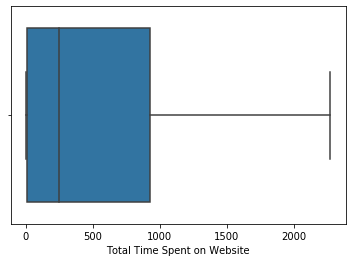

In [228]:
#Analyzing Outliers for Total Time Spent on Website
sns.boxplot(base_data_df['Total Time Spent on Website'])

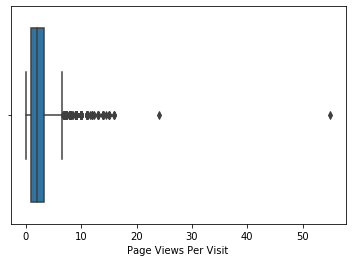

In [229]:
#Analyzing Outliers for Page Views Per Visit
sns.boxplot(base_data_df['Page Views Per Visit'])

In [230]:
#Treating Outliers
q1 = base_data_df['Page Views Per Visit'].quantile(0.05)
q3 = base_data_df['Page Views Per Visit'].quantile(0.95)
base_data_df = base_data_df[(base_data_df['Page Views Per Visit'] >= q1) & (base_data_df['Page Views Per Visit'] <= q3)]

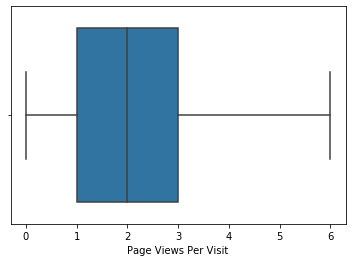

In [231]:
#Analyzing Outliers for Page Views Per Visit
sns.boxplot(base_data_df['Page Views Per Visit'])

**Model Building Activities**

In [232]:
base_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8714 entries, 0 to 9239
Data columns (total 14 columns):
Prospect ID                        8714 non-null object
Lead Origin                        8714 non-null object
Lead Source                        8714 non-null object
Do Not Email                       8714 non-null int64
Converted                          8714 non-null int64
TotalVisits                        8714 non-null float64
Total Time Spent on Website        8714 non-null int64
Page Views Per Visit               8714 non-null float64
Last Activity                      8714 non-null object
Specialization                     8714 non-null object
What is your current occupation    8714 non-null object
Tags                               8714 non-null object
Lead Quality                       8714 non-null object
Last Notable Activity              8714 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 1021.2+ KB


In [233]:
base_data_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Chat Engine,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Search Engines,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Not Contactable,Not Sure,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Not Contactable,Not Sure,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Search Engines,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Modified


In [234]:
# Generating Dummies
dummy_cols=['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','Last Notable Activity']

dummy_vals=pd.get_dummies(base_data_df[dummy_cols],drop_first=True)
dummy_vals.head()


,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Chat Engine,Lead Source_Direct Traffic,Lead Source_Others,Lead Source_Refernces,Lead Source_Search Engines,Lead Source_Social Media,Last Activity_Converted to Lead,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [235]:
#Merging Dummies with actual dataset
base_data_df = pd.concat([base_data_df, dummy_vals], axis=1)
base_data_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Chat Engine,0,0,0.0,0,0.0,Page Visited on Website,Others,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Search Engines,0,0,5.0,674,2.5,Email Opened,Others,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Search Engines,0,1,2.0,1428,1.0,Converted to Lead,Others,...,0,0,1,0,0,0,0,0,0,0


In [236]:
#Dropping Original Columns, since wer have generated dummies
base_data_df = base_data_df.drop(dummy_cols, axis = 1)

In [237]:
base_data_df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Chat Engine,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [238]:
# Storing Target variable into different variable
tgt_var=base_data_df['Converted']

In [239]:
# Storing Main Features in different Variable
ftr_var=base_data_df.drop(['Prospect ID','Converted'], axis=1)

In [240]:
tgt_var.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [241]:
ftr_var.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Chat Engine,Lead Source_Direct Traffic,Lead Source_Others,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [242]:
base_data_df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Chat Engine,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [243]:
#Generating Test Train Data
X_train, X_test, y_train, y_test = train_test_split(ftr_var, tgt_var, train_size=0.7, test_size=0.3, random_state=100)

In [244]:
# Scaling the Data
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Chat Engine,Lead Source_Direct Traffic,Lead Source_Others,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7122,1,-0.473080,-0.401646,-0.676244,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
5261,0,1.472514,-0.213414,0.231492,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3585,0,-0.689258,-0.877762,-1.281402,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
228,0,0.823983,-0.741202,0.128615,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
5330,0,0.607806,2.034297,0.534070,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [245]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6099
Model:                            GLM   Df Residuals:                     6013
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 02 Mar 2020   Deviance:                          nan
Time:                        22:08:08   Pearson chi2:                 3.92e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   4.203e+15      1e+08   4.19e+07      0.000     4.2e+15     4.2e+15
Do Not Email                                           -6.624e+14   4.76e+06  -1.39e+08      0.000   -6.62e+14   -6.62e+14
TotalVisits                                             3.855e+13   9.96e+05   3.87e+07      0.000    3.85e+13    3.85e+13
Total Time Spent on Website                             3.893e+14   1.06e+06   3.68e+08      0.000    3.89e+14    3.89e+14
Page Views Per Visit                                   -1.698e+14   1.42e+06   -1.2e+08      0.000    -1.7e+14    -1.7e+14
Lead Origin_Landing Page Submission                     -1.64e+14   3.49e+06   -4.7e+07      0.000   -1.64e+14   -1.64e+14
Lead Origin_Lead Add Form                               2.414e+14      9e+06   2.68e+07      0.000    2.41e+14    2.41e+14
Lead Origin_Lead Import                                 2.225e+14   4.22e+07   5.27e+06      0.000    2.23e+14    2.23e+14
Lead Source_Chat Engine                                 2.802e+14   6.73e+07   4.16e+06      0.000     2.8e+14     2.8e+14
Lead Source_Direct Traffic                             -6.516e+13   6.72e+07  -9.69e+05      0.000   -6.52e+13   -6.52e+13
Lead Source_Others                                      6.976e+14   6.81e+07   1.02e+07      0.000    6.98e+14    6.98e+14
Lead Source_Refernces                                  -1.578e+14   6.76e+07  -2.33e+06      0.000   -1.58e+14   -1.58e+14
Lead Source_Search Engines                              7.605e+13   6.72e+07   1.13e+06      0.000    7.61e+13    7.61e+13
Lead Source_Social Media                               -5.985e+14   7.77e+07   -7.7e+06      0.000   -5.98e+14   -5.98e+14
Last Activity_Converted to Lead                         2.595e+14   3.43e+07   7.57e+06      0.000    2.59e+14    2.59e+14
Last Activity_Email Bounced                             2.939e+14   3.47e+07   8.47e+06      0.000    2.94e+14    2.94e+14
Last Activity_Email Link Clicked                        6.056e+14   3.49e+07   1.73e+07      0.000    6.06e+14    6.06e+14
Last Activity_Email Marked Spam                         -9.87e+14   4.13e+07  -2.39e+07      0.000   -9.87e+14   -9.87e+14
Last Activity_Email Opened                              4.287e+14   3.41e+07   1.26e+07      0.000    4.29e+14    4.29e+14
Last Activity_Email Received                            4.583e+15   7.54e+07   6.08e+07      0.000    4.58e+15    4.58e+15
Last Activity_Form Submitted on Website                 5.656e+14   3.49e+07   1.62e+07      0.000    5.66e+14    5.66e+14
Last Activity_Had a Phone Conversation                  1.181e+15   4.06e+07   2.91e+07      0.000    1.18e+15    1.18e+15
Last Act

In [246]:
#Running RFE to identify top 20 Features
logreg = LogisticRegression()
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

In [247]:
rfe.support_

array([ True, False,  True, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False,  True, False, False,  True,  True,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True,  True,  True, False])

In [248]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 43),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 36),
 ('Lead Origin_Landing Page Submission', False, 25),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 53),
 ('Lead Source_Chat Engine', False, 2),
 ('Lead Source_Direct Traffic', False, 37),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Refernces', False, 32),
 ('Lead Source_Search Engines', False, 57),
 ('Lead Source_Social Media', False, 33),
 ('Last Activity_Converted to Lead', False, 17),
 ('Last Activity_Email Bounced', False, 10),
 ('Last Activity_Email Link Clicked', False, 51),
 ('Last Activity_Email Marked Spam', False, 49),
 ('Last Activity_Email Opened', False, 63),
 ('Last Activity_Email Received', False, 62),
 ('Last Activity_Form Submitted on Website', False, 42),
 ('Last Activity_Had a Phone Conversation', False, 13),
 ('Last Activity_Olark Chat Conversation', False, 8),
 ('Last Activity_Page Visited on W

In [249]:
col = X_train.columns[rfe.support_]

In [250]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6099
Model:                            GLM   Df Residuals:                     6078
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1097.5
Date:                Mon, 02 Mar 2020   Deviance:                       2194.9
Time:                        22:08:14   Pearson chi2:                 1.09e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.9940      0.275     -7.242      0.000      -2.534      -1.454
Do Not Email                                     -1.4311      0.266     -5.381      0.000      -1.952      -0.910
Total Time Spent on Website                       0.9012      0.058     15.599      0.000       0.788       1.014
Lead Origin_Lead Add Form                         1.4309      0.416      3.440      0.001       0.616       2.246
Lead Source_Others                                1.3573      0.702      1.932      0.053      -0.019       2.734
Last Activity_SMS Sent                            1.2058      0.232      5.209      0.000       0.752       1.660
What is your current occupation_Other            -2.9229      0.147    -19.899      0.000      -3.211      -2.635
Tags_Busy                                         2.4324      0.349      6.969      0.000       1.748       3.116
Tags_Closed by Horizzon                           8.3192      1.049      7.928      0.000       6.263      10.376
Tags_Lateral student                             27.2711   1.14e+05      0.000      1.000   -2.22e+05    2.23e+05
Tags_Lost Leads                                   7.8390      0.476     16.460      0.000       6.906       8.772
Tags_Not Contactable                             -2.2087      0.349     -6.323      0.000      -2.893      -1.524
Tags_Not Eligible                               -21.5156   1.55e+04     -0.001      0.999   -3.05e+04    3.04e+04
Tags_Will revert after reading the email          4.4144      0.271     16.300      0.000       3.884       4.945
Lead Quality_Not Sure                            -1.6096      0.160    -10.079      0.000      -1.923      -1.297
Lead Quality_Worst                               -3.0816      0.768     -4.013      0.000      -4.587      -1.576
Last Notable Activity_Modified                   -1.0985      0.155     -7.109      0.000      -1.401      -0.796
Last Notable Activity_Olark Chat Conversation    -1.6442      0.471     -3.494      0.000      -2.567      -0.722
Last Notable Activity_SMS Sent                    1.0870      0.272      3.993      0.000       0.553       1.620
Last Notable Activity_Unreachable                 1.2279      0.702      1.749      0.080      -0.148       2.604
Last Notable Activity_Unsubscribed                1.8301      0.762      2.402      0.016       0.337       3.324
=================================================================================================================
"""

In [251]:
# Dropping Column Tags_Lateral student,since it has high P value
new_cols=col.drop('Tags_Lateral student',1)

In [252]:
#Re-Train Model
X_train_sm = sm.add_constant(X_train[new_cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6099
Model:                            GLM   Df Residuals:                     6079
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1102.1
Date:                Mon, 02 Mar 2020   Deviance:                       2204.2
Time:                        22:08:14   Pearson chi2:                 1.11e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.8670      0.264     -7.081      0.000      -2.384      -1.350
Do Not Email                                     -1.4378      0.266     -5.401      0.000      -1.960      -0.916
Total Time Spent on Website                       0.8946      0.058     15.542      0.000       0.782       1.007
Lead Origin_Lead Add Form                         1.4462      0.414      3.494      0.000       0.635       2.257
Lead Source_Others                                1.3323      0.700      1.903      0.057      -0.040       2.705
Last Activity_SMS Sent                            1.2704      0.229      5.538      0.000       0.821       1.720
What is your current occupation_Other            -2.9167      0.147    -19.884      0.000      -3.204      -2.629
Tags_Busy                                         2.3182      0.341      6.806      0.000       1.651       2.986
Tags_Closed by Horizzon                           8.2001      1.046      7.838      0.000       6.150      10.251
Tags_Lost Leads                                   7.7371      0.470     16.457      0.000       6.816       8.659
Tags_Not Contactable                             -2.3288      0.341     -6.832      0.000      -2.997      -1.661
Tags_Not Eligible                               -21.6212   1.55e+04     -0.001      0.999   -3.04e+04    3.03e+04
Tags_Will revert after reading the email          4.2968      0.259     16.582      0.000       3.789       4.805
Lead Quality_Not Sure                            -1.6325      0.159    -10.252      0.000      -1.945      -1.320
Lead Quality_Worst                               -3.1747      0.756     -4.198      0.000      -4.657      -1.693
Last Notable Activity_Modified                   -1.1029      0.154     -7.145      0.000      -1.405      -0.800
Last Notable Activity_Olark Chat Conversation    -1.6373      0.470     -3.486      0.000      -2.558      -0.717
Last Notable Activity_SMS Sent                    1.0299      0.270      3.813      0.000       0.501       1.559
Last Notable Activity_Unreachable                 1.2331      0.702      1.756      0.079      -0.144       2.610
Last Notable Activity_Unsubscribed                1.8395      0.760      2.419      0.016       0.349       3.330
=================================================================================================================
"""

In [253]:
#Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train[new_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[new_cols].values, i) for i in range(X_train[new_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Last Notable Activity_SMS Sent,6.16
4,Last Activity_SMS Sent,5.87
12,Lead Quality_Not Sure,4.32
11,Tags_Will revert after reading the email,3.76
5,What is your current occupation_Other,3.15
14,Last Notable Activity_Modified,2.14
9,Tags_Not Contactable,1.91
2,Lead Origin_Lead Add Form,1.72
3,Lead Source_Others,1.32
7,Tags_Closed by Horizzon,1.23


In [254]:
# Dropping Column Tags_Not Eligible student,since it has high P value
new_cols=new_cols.drop('Tags_Not Eligible',1)

In [255]:
#Re-Train Model
X_train_sm = sm.add_constant(X_train[new_cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6099
Model:                            GLM   Df Residuals:                     6080
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1105.3
Date:                Mon, 02 Mar 2020   Deviance:                       2210.6
Time:                        22:08:15   Pearson chi2:                 1.12e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.0284      0.260     -7.815      0.000      -2.537      -1.520
Do Not Email                                     -1.4437      0.266     -5.432      0.000      -1.965      -0.923
Total Time Spent on Website                       0.8945      0.057     15.557      0.000       0.782       1.007
Lead Origin_Lead Add Form                         1.4628      0.415      3.524      0.000       0.649       2.276
Lead Source_Others                                1.3239      0.701      1.889      0.059      -0.050       2.697
Last Activity_SMS Sent                            1.2751      0.230      5.553      0.000       0.825       1.725
What is your current occupation_Other            -2.9194      0.147    -19.897      0.000      -3.207      -2.632
Tags_Busy                                         2.4686      0.339      7.293      0.000       1.805       3.132
Tags_Closed by Horizzon                           8.3479      1.046      7.983      0.000       6.298      10.398
Tags_Lost Leads                                   7.8889      0.469     16.819      0.000       6.970       8.808
Tags_Not Contactable                             -2.1772      0.338     -6.439      0.000      -2.840      -1.514
Tags_Will revert after reading the email          4.4497      0.256     17.356      0.000       3.947       4.952
Lead Quality_Not Sure                            -1.6261      0.159    -10.231      0.000      -1.938      -1.315
Lead Quality_Worst                               -3.1659      0.756     -4.190      0.000      -4.647      -1.685
Last Notable Activity_Modified                   -1.0949      0.154     -7.102      0.000      -1.397      -0.793
Last Notable Activity_Olark Chat Conversation    -1.6273      0.470     -3.459      0.001      -2.549      -0.705
Last Notable Activity_SMS Sent                    1.0325      0.270      3.821      0.000       0.503       1.562
Last Notable Activity_Unreachable                 1.2379      0.702      1.763      0.078      -0.139       2.614
Last Notable Activity_Unsubscribed                1.8531      0.760      2.439      0.015       0.364       3.342
=================================================================================================================
"""

In [256]:
#Re-Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train[new_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[new_cols].values, i) for i in range(X_train[new_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Notable Activity_SMS Sent,6.16
4,Last Activity_SMS Sent,5.87
11,Lead Quality_Not Sure,4.25
10,Tags_Will revert after reading the email,3.74
5,What is your current occupation_Other,3.13
13,Last Notable Activity_Modified,2.13
9,Tags_Not Contactable,1.88
2,Lead Origin_Lead Add Form,1.72
3,Lead Source_Others,1.32
7,Tags_Closed by Horizzon,1.23


In [257]:
#Dropping Column Last Notable Activity_SMS Sent,owing to high VIF
new_cols=new_cols.drop('Last Notable Activity_SMS Sent',1)

In [258]:
#Re-Train Model
X_train_sm = sm.add_constant(X_train[new_cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6099
Model:                            GLM   Df Residuals:                     6081
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1112.7
Date:                Mon, 02 Mar 2020   Deviance:                       2225.4
Time:                        22:08:16   Pearson chi2:                 1.24e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.9363      0.257     -7.547      0.000      -2.439      -1.433
Do Not Email                                     -1.4257      0.267     -5.342      0.000      -1.949      -0.903
Total Time Spent on Website                       0.8899      0.057     15.550      0.000       0.778       1.002
Lead Origin_Lead Add Form                         1.3847      0.418      3.315      0.001       0.566       2.203
Lead Source_Others                                1.2868      0.708      1.817      0.069      -0.101       2.675
Last Activity_SMS Sent                            2.0013      0.128     15.654      0.000       1.751       2.252
What is your current occupation_Other            -2.9523      0.147    -20.131      0.000      -3.240      -2.665
Tags_Busy                                         2.5410      0.335      7.588      0.000       1.885       3.197
Tags_Closed by Horizzon                           8.5372      1.047      8.154      0.000       6.485      10.589
Tags_Lost Leads                                   8.0493      0.473     17.026      0.000       7.123       8.976
Tags_Not Contactable                             -2.0186      0.331     -6.097      0.000      -2.668      -1.370
Tags_Will revert after reading the email          4.4901      0.255     17.589      0.000       3.990       4.990
Lead Quality_Not Sure                            -1.6386      0.160    -10.245      0.000      -1.952      -1.325
Lead Quality_Worst                               -3.2025      0.754     -4.248      0.000      -4.680      -1.725
Last Notable Activity_Modified                   -1.4468      0.128    -11.307      0.000      -1.698      -1.196
Last Notable Activity_Olark Chat Conversation    -1.7415      0.472     -3.691      0.000      -2.666      -0.817
Last Notable Activity_Unreachable                 1.1261      0.703      1.601      0.109      -0.252       2.504
Last Notable Activity_Unsubscribed                1.7449      0.759      2.298      0.022       0.256       3.233
=================================================================================================================
"""

In [259]:
#Re-Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train[new_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[new_cols].values, i) for i in range(X_train[new_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Lead Quality_Not Sure,4.22
10,Tags_Will revert after reading the email,3.56
5,What is your current occupation_Other,3.07
9,Tags_Not Contactable,1.87
13,Last Notable Activity_Modified,1.74
2,Lead Origin_Lead Add Form,1.72
4,Last Activity_SMS Sent,1.68
3,Lead Source_Others,1.32
7,Tags_Closed by Horizzon,1.23
1,Total Time Spent on Website,1.22


In [260]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7122    0.000232
5261    0.003068
3585    0.013856
228     0.000453
5330    0.987433
664     0.017488
2024    0.997618
7826    0.000610
3353    0.929192
2416    0.064439
dtype: float64

In [261]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.31962907e-04, 3.06839624e-03, 1.38563416e-02, 4.52640323e-04,
       9.87433284e-01, 1.74882656e-02, 9.97618166e-01, 6.09997800e-04,
       9.29192025e-01, 6.44391954e-02])

In [262]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.000232,7122
1,0,0.003068,5261
2,0,0.013856,3585
3,0,0.000453,228
4,1,0.987433,5330


In [263]:
# Creating new column 'predicted' with 1 if Converted_prob > 0.79 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.79 else 0)

# Dataset info
y_train_pred_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6099 entries, 0 to 6098
Data columns (total 4 columns):
Converted         6099 non-null int64
Converted_prob    6099 non-null float64
Prospect ID       6099 non-null int64
Predicted         6099 non-null int64
dtypes: float64(1), int64(3)
memory usage: 190.7 KB


In [264]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.000232,7122,0
1,0,0.003068,5261,0
2,0,0.013856,3585,0
3,0,0.000453,228,0
4,1,0.987433,5330,1


In [265]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9167076569929496


In [266]:
#Determining The Consusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3733   65]
 [ 443 1858]]


In [267]:
    # Predicted             Lead Converted    Lead Not Converted 
# Actual
# Lead Converted                 3733             65
# Lead Not Converted             443              1858  

In [268]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [269]:
#Calculating Sensitivity
round((TP / float(TP+FN)),2)

0.81

In [270]:
#Calculating specificity
round((TN / float(TN+FP)),2)

0.98

In [271]:
# Calculate false postive rate
round((FP/ float(TN+FP)),2)

0.02

In [272]:
# Positive Predictive Value 
round((TP / float(TP+FP)),2)

0.97

In [273]:
# Negative predictive value
round((TN / float(TN+ FN)),2)

0.89

In [274]:
#Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('X Education Lead Conversion')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [275]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

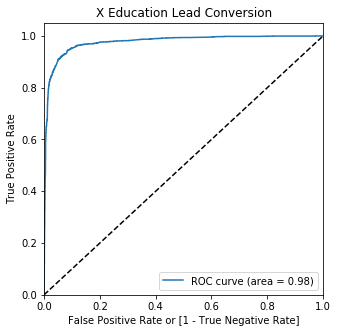

In [276]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [277]:
#finding optimal cutoff point
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000232,7122,0,1,0,0,0,0,0,0,0,0,0
1,0,0.003068,5261,0,1,0,0,0,0,0,0,0,0,0
2,0,0.013856,3585,0,1,0,0,0,0,0,0,0,0,0
3,0,0.000453,228,0,1,0,0,0,0,0,0,0,0,0
4,1,0.987433,5330,1,1,1,1,1,1,1,1,1,1,1


In [278]:
#Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377275  1.000000  0.000000
0.1   0.1  0.875881  0.971317  0.818062
0.2   0.2  0.913920  0.958714  0.886783
0.3   0.3  0.926381  0.943503  0.916008
0.4   0.4  0.931628  0.917862  0.939968
0.5   0.5  0.933432  0.905693  0.950237
0.6   0.6  0.929169  0.870491  0.964718
0.7   0.7  0.924086  0.836593  0.977093
0.8   0.8  0.916708  0.806606  0.983412
0.9   0.9  0.880636  0.703173  0.988152


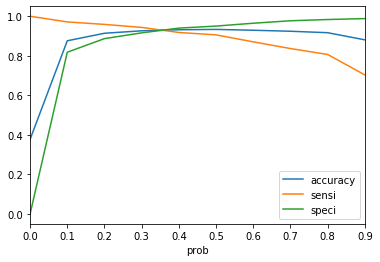

In [279]:
# Plotting Curve for Above Values.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**From Above  Curve, optimum point is between 0.3 & 0.4. Considering .35 as cutoff**

In [280]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.000232,7122,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.003068,5261,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.013856,3585,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000453,228,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.987433,5330,1,1,1,1,1,1,1,1,1,1,1,1


In [281]:
#Checking Overall Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.9294966387932448

In [282]:
#Recalculating Confusion Matrix & Other Factors
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion2

array([[3537,  261],
       [ 169, 2132]], dtype=int64)

In [283]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [284]:
#Calculating Sensitivity
round((TP / float(TP+FN)),2)

0.93

In [285]:
#Calculating specificity
round((TN / float(TN+FP)),2)

0.93

In [286]:
# Calculate false postive rate
round((FP/ float(TN+FP)),2)

0.07

In [287]:
# Positive Predictive Value 
round((TP / float(TP+FP)),2)

0.89

In [288]:
# Negative predictive value
round((TN / float(TN+ FN)),2)

0.95

**Precision & Recall**

In [289]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3733,   65],
       [ 443, 1858]], dtype=int64)

In [290]:
#Precision
round(confusion[1,1]/(confusion[0,1]+confusion[1,1]),2)

0.97

In [291]:
#Recall
round(confusion[1,1]/(confusion[1,0]+confusion[1,1]),2)

0.81

In [292]:
# Precision & Recall Tradeoffs
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

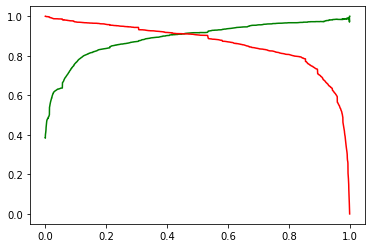

In [293]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**Predictions on Test Set**

In [294]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [295]:
X_test = X_test[new_cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Others,Last Activity_SMS Sent,What is your current occupation_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost Leads,Tags_Not Contactable,Tags_Will revert after reading the email,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
1864,0,-0.485870,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1028,0,-0.871018,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0
1508,0,-0.289662,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
2574,0,2.108431,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4272,0,0.130004,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [296]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
1864,0.085590
1028,0.010417
1508,0.091542
2574,0.988226
4272,0.990722


In [297]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index

In [298]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [299]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [300]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,1864,0.085590
1,0,1028,0.010417
2,0,1508,0.091542
3,1,2574,0.988226
4,1,4272,0.990722


In [301]:
# Renaming & Re arranging the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_prob'], axis=1)

In [302]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,1864,0,0.085590
1,1028,0,0.010417
2,1508,0,0.091542
3,2574,1,0.988226
4,4272,1,0.990722


In [303]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [304]:
#Final Dataset
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Final_Predicted
0,1864,0,0.085590,0
1,1028,0,0.010417,0
2,1508,0,0.091542,0
3,2574,1,0.988226,1
4,4272,1,0.990722,1


In [305]:
#Calculating Accuracy  of test model
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.92848948374761

In [306]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
confusion3

array([[1503,  116],
       [  71,  925]], dtype=int64)

In [307]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [308]:
#Sensitivity of Test Data
round((TP / float(TP+FN)),4)

0.9287

In [309]:
#Specificity of Test Data
round((TN / float(TN+FP)),4)

0.9284

**Done**